In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


data_path = '../data/Verkehrsdaten_Stadt_Graz_-_TU_Graz/'
ver_f = 'Verkehr Graz_Vergleich CoVID19_bis KW45_2021 mit DZS 111.xlsx'
dzs1_f = 'DZS_24h-Zählung-180101_211205.csv'
dzs2_f = 'DZS_div_24h-Zählung-180101_211205.csv'
dzs_cnt = 'Q@KFZ'

# 1. DZS_24h-Zählung-180101_211205.csv

## 1.0. Load Data

In [3]:
df1 = pd.read_csv(os.path.join(data_path, dzs1_f), sep=';')
df1['Time'] = pd.to_datetime(df1['Time'], format='%d.%m.%Y %H:%M:%S')
df1

,Name,Time,Q@KFZ,Unnamed: 3
0,8010_003,2018-01-02,0,0
1,8010_208,2018-01-02,663,183
2,8020_110,2018-01-02,534,49817
3,8020_119,2018-01-02,624,12964
4,8020_122,2018-01-02,668,1667
...,...,...,...,...
8581,8010_208,2021-12-06,593,2097
8582,8020_110,2021-12-06,420,50186
8583,8020_119,2021-12-06,383,4214
8584,8020_122,2021-12-06,677,2509


## 1.1. Time: Check abnomal

In [25]:
df1['date'] = df1['Time'].dt.date
df1['hour'] = df1['Time'].dt.hour
df1[df1['hour']!=0].set_index('Name').iloc[:, :-1]

,Time,Q@KFZ,Unnamed: 3,date
Name,,,,
8010_003,2018-10-28 23:00:00,529,33655,2018-10-28
8010_208,2018-10-28 23:00:00,761,8759,2018-10-28
8020_110,2018-10-28 23:00:00,748,6699,2018-10-28
8020_119,2018-10-28 23:00:00,358,54443,2018-10-28
8020_122,2018-10-28 23:00:00,940,0,2018-10-28
8053_111,2018-10-28 23:00:00,698,8655,2018-10-28
8010_003,2019-10-27 23:00:00,534,9991,2019-10-27
8010_208,2019-10-27 23:00:00,664,9199,2019-10-27
8020_110,2019-10-27 23:00:00,825,555,2019-10-27


## 1.2. Time: Overview

In [28]:
def find_missing(x):
    return (set(pd.date_range(*x, freq='D')))

a = df1.groupby('Name').agg({'date': [min, max]}
                       ).droplevel(0, axis=1)
b = df1.groupby('Name')['Time'].apply(set)
a = a.join(b)
a.columns= ['start', 'end', 'set']
a['days'] = a[['start', 'end']].apply(find_missing, axis=1)
a['#expected_days'] = a['days'].apply(len)
a['#actual_days'] = df1.groupby('Name').agg({'date': 'nunique'})
# a['#expected_days'] = a['set'].apply(len)

a['missing'] = (a['days'] - a['set']).apply(list).apply(lambda x: sorted(x))
a['extra'] = (a['set'] - a['days']).apply(list).apply(lambda x: sorted(x))
a['missing (days)'] = a['#expected_days'] - a['#actual_days']#a['missing'].apply(len)
a = a.drop(['set', 'days'], axis=1)
a.drop(['missing', 'extra'], axis=1)

,start,end,#expected_days,#actual_days,missing (days)
Name,,,,,
8010_003,2018-01-02,2021-12-06,1435,1427,8
8010_208,2018-01-02,2021-12-06,1435,1427,8
8020_110,2018-01-02,2021-12-06,1435,1427,8
8020_119,2018-01-02,2021-12-06,1435,1427,8
8020_122,2018-01-02,2021-12-06,1435,1427,8
8053_111,2018-01-02,2021-12-06,1435,1427,8


In [131]:
a['missing'].apply(pd.Series)

,0,1,2,3,4,5,6,7
Name,,,,,,,,
8010_003,2018-03-26,2018-10-29,2019-04-01,2019-10-28,2020-03-30,2020-10-26,2021-03-29,2021-11-01
8010_208,2018-03-26,2018-10-29,2019-04-01,2019-10-28,2020-03-30,2020-10-26,2021-03-29,2021-11-01
8020_110,2018-03-26,2018-10-29,2019-04-01,2019-10-28,2020-03-30,2020-10-26,2021-03-29,2021-11-01
8020_119,2018-03-26,2018-10-29,2019-04-01,2019-10-28,2020-03-30,2020-10-26,2021-03-29,2021-11-01
8020_122,2018-03-26,2018-10-29,2019-04-01,2019-10-28,2020-03-30,2020-10-26,2021-03-29,2021-11-01
8053_111,2018-03-26,2018-10-29,2019-04-01,2019-10-28,2020-03-30,2020-10-26,2021-03-29,2021-11-01


In [135]:
a['extra'].apply(pd.Series)

,0,1,2,3
Name,,,,
8010_003,2018-10-28 23:00:00,2019-10-27 23:00:00,2020-10-25 23:00:00,2021-10-31 23:00:00
8010_208,2018-10-28 23:00:00,2019-10-27 23:00:00,2020-10-25 23:00:00,2021-10-31 23:00:00
8020_110,2018-10-28 23:00:00,2019-10-27 23:00:00,2020-10-25 23:00:00,2021-10-31 23:00:00
8020_119,2018-10-28 23:00:00,2019-10-27 23:00:00,2020-10-25 23:00:00,2021-10-31 23:00:00
8020_122,2018-10-28 23:00:00,2019-10-27 23:00:00,2020-10-25 23:00:00,2021-10-31 23:00:00
8053_111,2018-10-28 23:00:00,2019-10-27 23:00:00,2020-10-25 23:00:00,2021-10-31 23:00:00


## 1.3. Count: Statistics

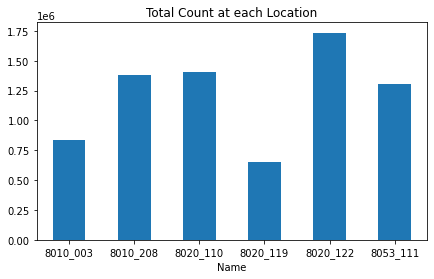

In [195]:
df1.groupby('Name')[[dzs_cnt]].sum().plot.bar(figsize=(7, 4), 
                                              title='Total Count at each Location',
                                              legend=None)
plt.xticks(rotation=0);

In [33]:
df1.groupby('Name')[[dzs_cnt]].describe().astype(int)#round(0)

Q@KFZ                                        
         count  mean  std  min   25%   50%   75%   max
Name                                                  
8010_003  1431   583  262   -1   481   675   770  1720
8010_208  1431   963  249  181   786   999  1164  1409
8020_110  1431   981  276   -1   815  1024  1184  1575
8020_119  1431   454  153   -1   382   452   496  1025
8020_122  1431  1212  281   -1  1008  1283  1443  1655
8053_111  1431   912  198   -1   793   982  1059  1209

In [239]:
a = pd.DataFrame(df1.groupby('Name')[dzs_cnt].value_counts())
a.columns = ['value_count']
a = a.reset_index()
a[a[dzs_cnt]<=0].reset_index(drop=True)

,Name,Q@KFZ,value_count
0,8010_003,0,164
1,8010_003,-1,9
2,8020_110,-1,4
3,8020_110,0,2
4,8020_119,0,2
5,8020_119,-1,1
6,8020_122,-1,3
7,8053_111,0,2
8,8053_111,-1,1


## 1.4. Plots

In [ ]:
px.histogram(df1, x=dzs_cnt, color='Name', 
             title='Distribution of values', #barmode="overlay",
             nbins=200, #opacity=.5
            )

In [ ]:
xmin, xmax = df1[dzs_cnt].min(), df1[dzs_cnt].max()
for name in df1['Name'].unique():
#     fig = go.Figure()
    tmp = df1[df1['Name']==name]
    fig = px.histogram(tmp[dzs_cnt], nbins=200,
                       color_discrete_sequence=['rgb(55, 83, 109)']
                      )
    fig.update_layout(xaxis_range=[xmin, xmax],
                      yaxis_range=[0, 170],
                      height=350, width=600, 
                      title=f'<b>Name: {name}</b>',
                      margin=dict({'t': 40}),
                      showlegend=False,                      
                     )
    fig.show()

In [ ]:
px.line(df1, color='Name', x='Time', y=dzs_cnt,
        title='<b>#Veh over time at different stations</b>'
       )

# 2. DZS_div_24h-Zählung-180101_211205.csv

## 2.0. Load Data

In [5]:
df2 = pd.read_csv(os.path.join(data_path, dzs2_f), sep=';', encoding='iso8859_2')
df2['Time'] = pd.to_datetime(df2['Time'], format='%d.%m.%Y %H:%M:%S')
df2['location'] = df2['Name'].str[:8]
df2

,Name,Time,Q@KFZ,Unnamed: 3,location
0,8010_205,2018-01-02,352,54166.0,8010_205
1,8010_209,2018-01-02,344,0.0,8010_209
2,8010_214,2018-01-02,341,0.0,8010_214
3,8010_202_Nord,2018-01-02,0,0.0,8010_202
4,8010_205_Ost,2018-01-02,176,45833.0,8010_205
...,...,...,...,...,...
49788,8055_108,2021-12-06,337,63855.0,8055_108
49789,8055_108_Nord,2021-12-06,172,71576.0,8055_108
49790,8055_108_Nord_bis20210121,2021-12-06,40,463543.0,8055_108
49791,8055_108_Süd,2021-12-06,164,9228.0,8055_108


In [3]:
name_list = sorted(df2['Name'].unique())
a = pd.DataFrame(name_list, columns=['full_name'])
a['short_name'] = a['full_name'].str[:8]
a

,full_name,short_name
0,8010_202_Nord,8010_202
1,8010_205,8010_205
2,8010_205_Ost,8010_205
3,8010_205_West,8010_205
4,8010_209,8010_209
5,8010_209_Ost,8010_209
6,8010_209_West,8010_209
7,8010_213_Ost,8010_213
8,8010_214,8010_214
9,8010_214_Nord,8010_214


In [4]:
sorted(a['short_name'].unique())

['8010_202',
 '8010_205',
 '8010_209',
 '8010_213',
 '8010_214',
 '8020_102',
 '8020_103',
 '8020_107',
 '8041_218',
 '8041_221',
 '8045_203',
 '8045_238',
 '8051_101',
 '8055_108']

In [33]:
df2['date'] = df2['Time'].dt.date
df2['hour'] = df2['Time'].dt.hour
df2[df2['hour']!=0].set_index('Name').iloc[:, :-1]

,Time,Q@KFZ,Unnamed: 3,location,date
Name,,,,,
8010_205,2018-10-28 23:00:00,458,4166.0,8010_205,2018-10-28
8010_209,2018-10-28 23:00:00,447,8334.0,8010_209,2018-10-28
8010_214,2018-10-28 23:00:00,501,625.0,8010_214,2018-10-28
8010_202_Nord,2018-10-28 23:00:00,207,66713.0,8010_202,2018-10-28
8010_205_Ost,2018-10-28 23:00:00,237,125.0,8010_205,2018-10-28
...,...,...,...,...,...
8055_108,2021-10-31 23:00:00,564,433.0,8055_108,2021-10-31
8055_108_Nord,2021-10-31 23:00:00,282,67096.0,8055_108,2021-10-31
8055_108_Nord_bis20210121,2021-10-31 23:00:00,91,98137.0,8055_108,2021-10-31


## Time: Check missing days

In [34]:
def find_missing(x):
    return (set(pd.date_range(*x, freq='D')))

a = df2.groupby('Name').agg({'date': [min, max]}
                       ).droplevel(0, axis=1)
b = df2.groupby('Name')['Time'].apply(set)
a = a.join(b)
a.columns= ['start', 'end', 'set']
a['days'] = a[['start', 'end']].apply(find_missing, axis=1)
a['#expected_days'] = a['days'].apply(len)
a['#actual_days'] = df2.groupby('Name').agg({'date': 'nunique'})
# a['#expected_days'] = a['set'].apply(len)

a['missing'] = (a['days'] - a['set']).apply(list).apply(lambda x: sorted(x))
a['extra'] = (a['set'] - a['days']).apply(list).apply(lambda x: sorted(x))
a['missing (days)'] = a['#expected_days'] - a['#actual_days']#a['missing'].apply(len)
a = a.drop(['set', 'days'], axis=1)
a.drop(['missing', 'extra'], axis=1)

,start,end,#expected_days,#actual_days,missing (days)
Name,,,,,
8010_202_Nord,2018-01-02,2021-12-06,1435,1427,8
8010_205,2018-01-02,2021-12-06,1435,1427,8
8010_205_Ost,2018-01-02,2021-12-06,1435,1427,8
8010_205_West,2018-01-02,2021-12-06,1435,1427,8
8010_209,2018-01-02,2021-12-06,1435,1427,8
8010_209_Ost,2018-01-02,2021-12-06,1435,1427,8
8010_209_West,2018-01-02,2021-12-06,1435,1427,8
8010_213_Ost,2018-01-02,2021-12-06,1435,1427,8
8010_214,2018-01-02,2021-12-06,1435,1427,8


In [ ]:
a['missing'].apply(pd.Series)

In [ ]:
a['extra'].apply(pd.Series)

## Statistics 

In [ ]:
a = pd.DataFrame(df2.groupby('Name')[dzs_cnt].value_counts())
a.columns = ['value_count']
a = a.reset_index()
a[a[dzs_cnt]<0].sort_values('value_count', ascending=False).reset_index(drop=True)

In [30]:
df2.groupby('Name')[[dzs_cnt]].describe().round(1)

Q@KFZ                                        \
                            count    mean    std    min     25%     50%   
Name                                                                      
8010_202_Nord              1431.0   302.7  152.6   -1.0   198.5   355.0   
8010_205                   1431.0   645.2  219.9  117.0   492.0   627.0   
8010_205_Ost               1431.0   357.9   99.7   -1.0   273.0   384.0   
8010_205_West              1431.0   286.2  143.4   37.0   188.0   235.0   
8010_209                   1431.0   603.0  144.4  150.0   469.5   648.0   
8010_209_Ost               1431.0   262.7   66.4   64.0   203.0   278.0   
8010_209_West              1431.0   339.7   79.6   85.0   267.0   370.0   
8010_213_Ost               1431.0   594.4  149.0   -1.0   491.0   631.0   
8010_214                   1431.0   651.0  286.4   -1.0   485.0   738.0   
8010_214_Nord              1431.0   299.8  141.5   -1.0   228.5   339.0   
8010_214_Süd               1431.0   350.7  150.8   -1.0   260.5   404.0   
8020_102                   1431.0  1257.1  290.8   -1.0  1065.5  1332.0   
8020_102_Nord              1431.0   631.0  148.7   -1.0   535.0   672.0   
8020_102_Süd               1431.0   625.8  144.0   -1.0   531.5   657.0   
8020_103                   1431.0  1467.2  269.6  347.0  1295.0  1552.0   
8020_103_Nord              1431.0   752.5  142.5  174.0   653.5   802.0   
8020_103_Süd               1431.0   714.2  129.5  172.0   635.0   752.0   
8020_107                   1431.0   883.4  286.2   -1.0   702.0   994.0   
8020_107_Nord              1431.0   492.5  154.3   -1.0   402.0   552.0   
8020_107_Süd               1431.0   393.6  125.1   -1.0   305.0   439.0   
8041_218                   1431.0   443.7  148.0   -1.0   354.5   504.0   
8041_218_Nord              1431.0    95.2  107.6   -9.0    -1.0     0.0   
8041_218_Süd               1431.0    85.0  113.4   -1.0    -1.0    -1.0   
8041_221                   1431.0  1034.0  434.1   -1.0   733.5  1143.0   
8041_221_Ost               1431.0   509.8  218.4   -1.0   351.5   576.0   
8041_221_West              1431.0   525.3  219.7   -1.0   390.0   550.0   
8045_203                   1431.0   718.4  470.8   -1.0     0.0   877.0   
8045_203_Nord              1431.0   356.4  231.4   -1.0     0.0   443.0   
8045_203_Süd               1431.0   361.5  240.6   -1.0     0.0   433.0   
8045_238                    194.0   260.3   49.5    0.0   232.2   272.0   
8051_101                   1431.0  1202.2  297.5  205.0   990.5  1290.0   
8051_101_Nord              1431.0   546.2  140.6   -1.0   443.0   587.0   
8051_101_Süd               1431.0   659.8  160.0  109.0   552.0   703.0   
8055_108                    315.0   800.2  179.3    0.0   696.0   882.0   
8055_108_Nord               315.0   384.1   81.7    0.0   334.0   421.0   
8055_108_Nord_bis20210121  1431.0   323.4  151.3    0.0   176.5   354.0   
8055_108_Süd                315.0   415.6   98.0    0.0   360.5   461.0   
8055_108_Süd_bis20210121   1431.0   409.8  106.8    0.0   336.0   444.0   

                                           
                              75%     max  
Name                                       
8010_202_Nord               420.0   760.0  
8010_205                    840.0  1042.0  
8010_205_Ost                441.0   506.0  
8010_205_West               442.5   545.0  
8010_209                    709.0   930.0  
8010_209_Ost                309.0   434.0  
8010_209_West               401.0   502.0  
8010_213_Ost                710.5   936.0  
8010_214                    878.0  1047.0  
8010_214_Nord               402.0   530.0  
8010_214_Süd                472.0   568.0  
8020_102                   1482.5  1834.0  
8020_102_Nord               743.0   942.0  
8020_102_Süd                733.0   964.0  
8020_103                   1671.0  1892.0  
8020_103_Nord               862.0   991.0  
8020_103_Süd                806.0   944.0  
8020_107                   1098.0  1638.0  
8020_107_Nord               

## Plots

## Bar Chart

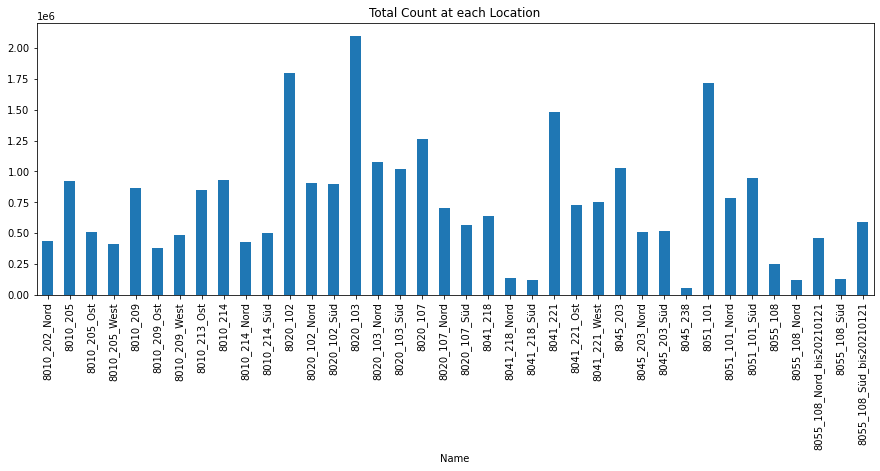

In [221]:
df2.groupby('Name')[[dzs_cnt]].sum().plot.bar(figsize=(15, 5), 
                                              title='Total Count at each Location',
                                              legend=None);
# plt.xticks(rotation=0);

### Histogram

In [ ]:
px.histogram(df2, x=dzs_cnt, color='Name', 
             title='Distribution of values', #barmode="overlay",
             nbins=250, opacity=.5
            )

In [ ]:
xmin, xmax = df2[dzs_cnt].min(), df2[dzs_cnt].max()
for name in df2['Name'].unique():
#     fig = go.Figure()
    tmp = df2[df2['Name']==name]
    fig = px.histogram(tmp[dzs_cnt], nbins=200,
                       color_discrete_sequence=['rgb(55, 83, 109)']
                      )
    fig.update_layout(xaxis_range=[xmin, xmax],
                      yaxis_range=[0, 170],
                      height=350, width=600, 
                      title=f'<b>Name: {name}</b>',
                      margin=dict({'t': 40}),
                      showlegend=False,                      
                     )
    fig.show()

### Time Series

In [ ]:
px.line(df2, color='Name', x='Time', y=dzs_cnt,
        title='<b>#Veh over time at different stations</b>'
       )

# 3. Verkehr Graz_Vergleich CoVID19_bis KW45_2021 mit DZS 111

In [ ]:
codes = {
    'Karlauer Gürtel': '8020_122',
    'Keplerbrücke': '8010_003',
    'Rösselmühlgasse': '8020_119',
    'Glacis': '8010_208'
}

In [2]:
url = os.path.join(data_path, ver_f)
sheet_names = pd.ExcelFile(url, engine='openpyxl').sheet_names

dfs = {}
overview = pd.DataFrame()
for sheet_name in sheet_names:
    v = pd.read_excel(url, engine='openpyxl', 
                      sheet_name=sheet_name).dropna(how='all').dropna(how='all', axis=1)
    print(sheet_name, v.shape)
    if sheet_name == 'BvSuttner-Brücke': v = v.iloc[:-3, :]
    else:
        v = v.iloc[:-4, :]
    dfs[sheet_name] = v
    overview[sheet_name] = v.shape
    print(f'\t{v.shape}')

overview = overview.T
overview.columns = ['#rows', '#cols']
overview

BvSuttner-Brücke (339, 10)
	(336, 10)
Keplerbrücke (340, 76)
	(336, 76)
Karlauer Gürtel (340, 72)
	(336, 72)
Rösselmühlgasse (340, 76)
	(336, 76)
Don Bosco (340, 76)
	(336, 76)
Glacis (340, 76)
	(336, 76)
Kärntner Straße (340, 63)
	(336, 63)


,#rows,#cols
BvSuttner-Brücke,336,10
Keplerbrücke,336,76
Karlauer Gürtel,336,72
Rösselmühlgasse,336,76
Don Bosco,336,76
Glacis,336,76
Kärntner Straße,336,63


### Transform from `week+date` to `datetime`-value 

In [3]:
import locale
import time
import datetime
locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')

dfs_transformed = {}
day_name = 'day_name'

details = pd.DataFrame()
for i, v in dfs.items():
    print(i)
    kep = v.copy()
#     kep = dfs['Keplerbrücke'].copy()
    kep = kep.rename(columns={'Unnamed: 0': day_name, 'Unnamed: 1': 'time'})
    kep['time'] = kep['time'].astype(str).str[-8:].replace('00:00:00', '23:59:00')
    kep[day_name] = kep[day_name].fillna(method='ffill')
    kep.columns = kep.columns[:2].tolist() + \
                [f'{i[1:-2]}20{i[-2:]}' if '/' in i else f'{i[1:]}/2020' for i in kep.columns[2:]]
    a = kep.set_index([day_name, 'time']).stack().reset_index()
    a.columns = kep.columns[:2].tolist() + ['week', 'count']
    a['week_day'] = [time.strptime(i, "%A").tm_wday for i in a['day_name']]
    a['week_start'] = [datetime.datetime.strptime(i + '-1', 'W%V/%G-%u') for i in a['week']]
    a['date'] = a['week_start'] + pd.to_timedelta(a['week_day'], unit='D')
    a = a.drop(['week_day', 'week', 'week_start'], axis=1).set_index('date')
    a = a.sort_values(['date', 'time'])
    dfs_transformed[i] = a
    details[i] = a.shape
details = details.T
details.columns = ['#rows', '#cols']

years = pd.DataFrame()
for i, v in dfs_transformed.items():
    a = v.copy().reset_index()
    a['year'] = a['date'].dt.year
    years = pd.concat([years, pd.Series(a.groupby('year')['date'].nunique(), name=i)], axis=1)
years = years.T
years[[2019, 2020]] = years[[2019, 2020]].astype(int)
years['total'] = years.sum(axis=1).astype(int)
details = details.join(years, how='outer')
details

BvSuttner-Brücke
Keplerbrücke
Karlauer Gürtel
Rösselmühlgasse
Don Bosco
Glacis
Kärntner Straße


,#rows,#cols,2019,2020,2021,total
BvSuttner-Brücke,2688,3,7,49,NaN,56
Keplerbrücke,24864,3,14,186,318.0,518
Karlauer Gürtel,23520,3,14,158,318.0,490
Rösselmühlgasse,24864,3,14,186,318.0,518
Don Bosco,24864,3,14,186,318.0,518
Glacis,24864,3,14,186,318.0,518
Kärntner Straße,20496,3,14,95,318.0,427


In [123]:
dates_min_max = pd.DataFrame()
for i, v in dfs_transformed.items():
    info = pd.DataFrame()
    a = v.copy().reset_index()
    a['year'] = a['date'].dt.year
    b = a.groupby('year').agg({'date': [min, max]})
    b.columns = b.columns.set_levels([i], level=0)
    b[(i, 'duration')] = (b.iloc[:, 1] - b.iloc[:, 0]).dt.days + 1
    b[(i, 'actual')] = details.loc[i][b.index].astype(int)
    b = b.T
    dates_min_max = pd.concat([dates_min_max, b.unstack()])
    
#     break
dates_min_max


year               2019                                  2020           \
                 actual duration        max        min actual duration   
BvSuttner-Brücke      7        7 2019-04-07 2019-04-01     49       91   
Keplerbrücke         14       49 2019-05-19 2019-04-01    186      347   
Karlauer Gürtel      14       49 2019-05-19 2019-04-01    158      347   
Rösselmühlgasse      14       49 2019-05-19 2019-04-01    186      347   
Don Bosco            14       49 2019-05-19 2019-04-01    186      347   
Glacis               14       49 2019-05-19 2019-04-01    186      347   
Kärntner Straße      14       49 2019-05-19 2019-04-01     95      347   

year                                     2021                                 
                        max        min actual duration        max        min  
BvSuttner-Brücke 2020-04-19 2020-01-20    NaN      NaN        NaT        NaT  
Keplerbrücke     2020-12-31 2020-01-20    318      318 2021-11-14 2021-01-01  
Karlauer Gürtel  2020-12-31 2020-01-20    318      318 2021-11-14 2021-01-01  
Rösselmühlgasse  2020-12-31 2020-01-20    318      318 2021-11-14 2021-01-01  
Don Bosco        2020-12-31 2020-01-20    318      318 2021-11-14 2021-01-01  
Glacis           2020-12-31 2020-01-20    318      318 2021-11-14 2021-01-01  
Kärntner Straße  2020-12-31 2020-01-20    318      318 2021-11-14 2021-01-01

In [127]:
des = pd.DataFrame()
for i, v in dfs_transformed.items():
    des[i] = v['count'].describe()
#     break
des = des.T
des

,count,mean,std,min,25%,50%,75%,max
BvSuttner-Brücke,2688.0,369.422991,352.381860,0.0,63.000,283.500000,564.000000,1370.0
Keplerbrücke,24864.0,296.606026,216.735480,-0.5,75.000,287.000000,502.000000,923.5
Karlauer Gürtel,23520.0,562.871305,381.217621,-0.5,171.500,580.000000,915.586100,1334.5
Rösselmühlgasse,24864.0,189.577652,125.284607,-0.5,67.000,190.000000,307.061112,776.0
Don Bosco,24864.0,419.927352,303.375622,-0.5,117.875,407.500000,698.500000,1501.5
Glacis,24864.0,464.121790,345.975570,-0.5,111.500,429.327775,794.000000,1232.0
Kärntner Straße,20496.0,423.759612,281.385384,-0.5,127.500,444.500000,697.000000,1006.5


In [132]:
a = des.drop('min', axis=1).astype(int).join(des['min'])[des.columns]
a

,count,mean,std,min,25%,50%,75%,max
BvSuttner-Brücke,2688,369,352,0.0,63,283,564,1370
Keplerbrücke,24864,296,216,-0.5,75,287,502,923
Karlauer Gürtel,23520,562,381,-0.5,171,580,915,1334
Rösselmühlgasse,24864,189,125,-0.5,67,190,307,776
Don Bosco,24864,419,303,-0.5,117,407,698,1501
Glacis,24864,464,345,-0.5,111,429,794,1232
Kärntner Straße,20496,423,281,-0.5,127,444,697,1006


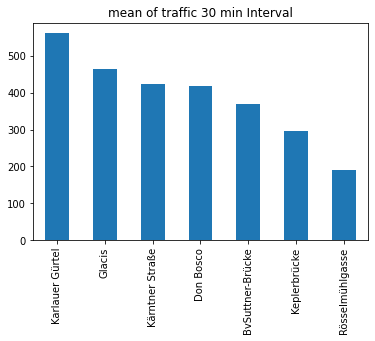

In [136]:
a['mean'].sort_values(ascending=False).plot.bar(title='mean of traffic 30 min Interval');

### Write to Excel

In [11]:
df = pd.DataFrame()
for k, v in dfs_transformed.items():
    tmp = v.reset_index().set_index(['date', 'day_name', 'time'])
    tmp.columns = [k]
    df = pd.concat([df, tmp], axis=1)
df

BvSuttner-Brücke  Keplerbrücke  Karlauer Gürtel  \
date       day_name time                                                        
2019-04-01 Montag   00:30:00             113.0          63.0            141.0   
                    01:00:00              82.0          55.0             98.0   
                    01:30:00              45.0          29.0             50.0   
                    02:00:00              47.0          18.0             68.0   
                    02:30:00              56.0          25.0             62.0   
...                                        ...           ...              ...   
2021-11-14 Sonntag  22:00:00               NaN         141.0            318.5   
                    22:30:00               NaN         128.0            280.0   
                    23:00:00               NaN          99.0            231.0   
                    23:30:00               NaN          81.5            174.0   
                    23:59:00               NaN          63.0            129.5   

                              Rösselmühlgasse  Don Bosco  Glacis  \
date       day_name time                                           
2019-04-01 Montag   00:30:00             69.0      157.0    87.0   
                    01:00:00             40.0       76.0    63.0   
                    01:30:00             37.0       84.0    51.0   
                    02:00:00             25.0       72.0    26.0   
                    02:30:00             31.0       74.0    24.0   
...                                       ...        ...     ...   
2021-11-14 Sonntag  22:00:00            115.0      177.0   219.0   
                    22:30:00            105.5      142.5   210.5   
                    23:00:00             96.5      126.0   153.0   
                    23:30:00             77.5       96.0    90.5   
                    23:59:00             59.0       73.5    81.0   

                              Kärntner Straße  
date       day_name time                       
2019-04-01 Montag   00:30:00            125.0  
                    01:00:00             65.0  
                    01:30:00             69.0  
                    02:00:00             54.5  
                    02:30:00             60.0  
...                                       ...  
2021-11-14 Sonntag  22:00:00            206.0  
                    22:30:00            160.0  
                    23:00:00            115.0  
                    23:30:00             90.5  
                    23:59:00             62.5  

[24864 rows x 7 columns]

In [12]:
df.to_csv(os.path.join(data_path, "Ver_transformed.csv"))

In [19]:
excel_file = pd.ExcelWriter(os.path.join(data_path, "Ver_transformed.xlsx"))
for i, v in dfs_transformed.items():
    v.index = v.index.astype(str)
    v.to_excel(
             excel_writer = excel_file, sheet_name=i
         )
excel_file.save()    

# 17.01.2022

# 4. Combine file 1 & 2 into one dataframe

In [147]:
a = df1.iloc[:, :3].pivot_table(columns=['Name'], index='Time')
b = df2.iloc[:, :3].pivot_table(columns=['Name'], index='Time')
df = a.join(b, how='outer').droplevel(0, axis=1)
df

Name,8010_003,8010_208,8020_110,8020_119,8020_122,8053_111,8010_202_Nord,8010_205,8010_205_Ost,8010_205_West,...,8045_203_Süd,8045_238,8051_101,8051_101_Nord,8051_101_Süd,8055_108,8055_108_Nord,8055_108_Nord_bis20210121,8055_108_Süd,8055_108_Süd_bis20210121
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0,663,534,624,668,467,0.0,352.0,176.0,176.0,...,187.0,NaN,543.0,246.0,297.0,NaN,NaN,158.0,NaN,164.0
2018-01-03,0,927,924,772,1191,904,0.0,673.0,318.0,354.0,...,370.0,NaN,1128.0,482.0,645.0,NaN,NaN,347.0,NaN,380.0
2018-01-04,0,962,922,772,1206,883,0.0,699.0,331.0,368.0,...,375.0,NaN,1099.0,483.0,616.0,NaN,NaN,354.0,NaN,383.0
2018-01-05,0,978,941,801,1233,900,0.0,720.0,344.0,376.0,...,378.0,NaN,1131.0,491.0,640.0,NaN,NaN,354.0,NaN,396.0
2018-01-06,0,1027,986,852,1278,946,0.0,743.0,359.0,383.0,...,406.0,NaN,1238.0,544.0,694.0,NaN,NaN,383.0,NaN,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,658,1098,889,733,1212,882,303.0,581.0,374.0,206.0,...,606.0,266.0,1143.0,529.0,613.0,780.0,379.0,85.0,400.0,379.0
2021-12-03,662,1096,860,724,1225,849,299.0,582.0,376.0,205.0,...,562.0,262.0,1113.0,514.0,598.0,761.0,369.0,82.0,391.0,369.0
2021-12-04,667,1114,907,750,1250,905,309.0,587.0,379.0,208.0,...,627.0,280.0,1222.0,561.0,661.0,809.0,381.0,88.0,428.0,381.0


df.iloc[:, -5:].tail(20).astype(int)

## 4.1. Remove Columns

In [148]:
removed_cols = ['8045_238', '8055_108']

df = df.drop(removed_cols, axis=1)

df = df[[i for i in df.columns if '8055_108' not in i]]
df

Name,8010_003,8010_208,8020_110,8020_119,8020_122,8053_111,8010_202_Nord,8010_205,8010_205_Ost,8010_205_West,...,8041_218_Süd,8041_221,8041_221_Ost,8041_221_West,8045_203,8045_203_Nord,8045_203_Süd,8051_101,8051_101_Nord,8051_101_Süd
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0,663,534,624,668,467,0.0,352.0,176.0,176.0,...,-1.0,459.0,230.0,229.0,376.0,188.0,187.0,543.0,246.0,297.0
2018-01-03,0,927,924,772,1191,904,0.0,673.0,318.0,354.0,...,-1.0,1070.0,518.0,552.0,755.0,384.0,370.0,1128.0,482.0,645.0
2018-01-04,0,962,922,772,1206,883,0.0,699.0,331.0,368.0,...,-1.0,1104.0,536.0,567.0,767.0,391.0,375.0,1099.0,483.0,616.0
2018-01-05,0,978,941,801,1233,900,0.0,720.0,344.0,376.0,...,-1.0,1126.0,548.0,577.0,776.0,397.0,378.0,1131.0,491.0,640.0
2018-01-06,0,1027,986,852,1278,946,0.0,743.0,359.0,383.0,...,-1.0,1175.0,577.0,597.0,838.0,431.0,406.0,1238.0,544.0,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,658,1098,889,733,1212,882,303.0,581.0,374.0,206.0,...,-1.0,1184.0,559.0,625.0,1149.0,542.0,606.0,1143.0,529.0,613.0
2021-12-03,662,1096,860,724,1225,849,299.0,582.0,376.0,205.0,...,-1.0,1157.0,548.0,609.0,1099.0,537.0,562.0,1113.0,514.0,598.0
2021-12-04,667,1114,907,750,1250,905,309.0,587.0,379.0,208.0,...,-1.0,1207.0,589.0,618.0,1207.0,580.0,627.0,1222.0,561.0,661.0


## 4.2. FillNA

### Move date at 23:00 to the next date

In [149]:
print(df.shape)
df['hour'] = df.index.hour
a = df[df['hour']!=0].copy()
removed_indices = a.index
a.index = a.index + pd.Timedelta(hours=1)
df = pd.concat([df, a])
df.drop('hour', axis=1, inplace=True)
df.drop(removed_indices, inplace=True)
df.sort_index(inplace=True)
print(df.shape)
df

(1431, 38)
(1431, 38)


Name,8010_003,8010_208,8020_110,8020_119,8020_122,8053_111,8010_202_Nord,8010_205,8010_205_Ost,8010_205_West,...,8041_218_Süd,8041_221,8041_221_Ost,8041_221_West,8045_203,8045_203_Nord,8045_203_Süd,8051_101,8051_101_Nord,8051_101_Süd
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0,663,534,624,668,467,0.0,352.0,176.0,176.0,...,-1.0,459.0,230.0,229.0,376.0,188.0,187.0,543.0,246.0,297.0
2018-01-03,0,927,924,772,1191,904,0.0,673.0,318.0,354.0,...,-1.0,1070.0,518.0,552.0,755.0,384.0,370.0,1128.0,482.0,645.0
2018-01-04,0,962,922,772,1206,883,0.0,699.0,331.0,368.0,...,-1.0,1104.0,536.0,567.0,767.0,391.0,375.0,1099.0,483.0,616.0
2018-01-05,0,978,941,801,1233,900,0.0,720.0,344.0,376.0,...,-1.0,1126.0,548.0,577.0,776.0,397.0,378.0,1131.0,491.0,640.0
2018-01-06,0,1027,986,852,1278,946,0.0,743.0,359.0,383.0,...,-1.0,1175.0,577.0,597.0,838.0,431.0,406.0,1238.0,544.0,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,658,1098,889,733,1212,882,303.0,581.0,374.0,206.0,...,-1.0,1184.0,559.0,625.0,1149.0,542.0,606.0,1143.0,529.0,613.0
2021-12-03,662,1096,860,724,1225,849,299.0,582.0,376.0,205.0,...,-1.0,1157.0,548.0,609.0,1099.0,537.0,562.0,1113.0,514.0,598.0
2021-12-04,667,1114,907,750,1250,905,309.0,587.0,379.0,208.0,...,-1.0,1207.0,589.0,618.0,1207.0,580.0,627.0,1222.0,561.0,661.0


### Add dates without Data

In [150]:
added_dates = pd.DataFrame(index=
                           pd.to_datetime(['26.03.2018', '01.04.2019', '30.03.2020', '29.03.2021'], dayfirst=True))
df = pd.concat([df, added_dates]).sort_index()
df

,8010_003,8010_208,8020_110,8020_119,8020_122,8053_111,8010_202_Nord,8010_205,8010_205_Ost,8010_205_West,...,8041_218_Süd,8041_221,8041_221_Ost,8041_221_West,8045_203,8045_203_Nord,8045_203_Süd,8051_101,8051_101_Nord,8051_101_Süd
2018-01-02,0.0,663.0,534.0,624.0,668.0,467.0,0.0,352.0,176.0,176.0,...,-1.0,459.0,230.0,229.0,376.0,188.0,187.0,543.0,246.0,297.0
2018-01-03,0.0,927.0,924.0,772.0,1191.0,904.0,0.0,673.0,318.0,354.0,...,-1.0,1070.0,518.0,552.0,755.0,384.0,370.0,1128.0,482.0,645.0
2018-01-04,0.0,962.0,922.0,772.0,1206.0,883.0,0.0,699.0,331.0,368.0,...,-1.0,1104.0,536.0,567.0,767.0,391.0,375.0,1099.0,483.0,616.0
2018-01-05,0.0,978.0,941.0,801.0,1233.0,900.0,0.0,720.0,344.0,376.0,...,-1.0,1126.0,548.0,577.0,776.0,397.0,378.0,1131.0,491.0,640.0
2018-01-06,0.0,1027.0,986.0,852.0,1278.0,946.0,0.0,743.0,359.0,383.0,...,-1.0,1175.0,577.0,597.0,838.0,431.0,406.0,1238.0,544.0,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,658.0,1098.0,889.0,733.0,1212.0,882.0,303.0,581.0,374.0,206.0,...,-1.0,1184.0,559.0,625.0,1149.0,542.0,606.0,1143.0,529.0,613.0
2021-12-03,662.0,1096.0,860.0,724.0,1225.0,849.0,299.0,582.0,376.0,205.0,...,-1.0,1157.0,548.0,609.0,1099.0,537.0,562.0,1113.0,514.0,598.0
2021-12-04,667.0,1114.0,907.0,750.0,1250.0,905.0,309.0,587.0,379.0,208.0,...,-1.0,1207.0,589.0,618.0,1207.0,580.0,627.0,1222.0,561.0,661.0
2021-12-05,437.0,754.0,617.0,585.0,878.0,603.0,178.0,372.0,250.0,121.0,...,-1.0,684.0,324.0,360.0,781.0,378.0,403.0,832.0,373.0,459.0


### Adjust timestamps

In [151]:
df.index = df.index - pd.Timedelta(days=1)
df

,8010_003,8010_208,8020_110,8020_119,8020_122,8053_111,8010_202_Nord,8010_205,8010_205_Ost,8010_205_West,...,8041_218_Süd,8041_221,8041_221_Ost,8041_221_West,8045_203,8045_203_Nord,8045_203_Süd,8051_101,8051_101_Nord,8051_101_Süd
2018-01-01,0.0,663.0,534.0,624.0,668.0,467.0,0.0,352.0,176.0,176.0,...,-1.0,459.0,230.0,229.0,376.0,188.0,187.0,543.0,246.0,297.0
2018-01-02,0.0,927.0,924.0,772.0,1191.0,904.0,0.0,673.0,318.0,354.0,...,-1.0,1070.0,518.0,552.0,755.0,384.0,370.0,1128.0,482.0,645.0
2018-01-03,0.0,962.0,922.0,772.0,1206.0,883.0,0.0,699.0,331.0,368.0,...,-1.0,1104.0,536.0,567.0,767.0,391.0,375.0,1099.0,483.0,616.0
2018-01-04,0.0,978.0,941.0,801.0,1233.0,900.0,0.0,720.0,344.0,376.0,...,-1.0,1126.0,548.0,577.0,776.0,397.0,378.0,1131.0,491.0,640.0
2018-01-05,0.0,1027.0,986.0,852.0,1278.0,946.0,0.0,743.0,359.0,383.0,...,-1.0,1175.0,577.0,597.0,838.0,431.0,406.0,1238.0,544.0,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,658.0,1098.0,889.0,733.0,1212.0,882.0,303.0,581.0,374.0,206.0,...,-1.0,1184.0,559.0,625.0,1149.0,542.0,606.0,1143.0,529.0,613.0
2021-12-02,662.0,1096.0,860.0,724.0,1225.0,849.0,299.0,582.0,376.0,205.0,...,-1.0,1157.0,548.0,609.0,1099.0,537.0,562.0,1113.0,514.0,598.0
2021-12-03,667.0,1114.0,907.0,750.0,1250.0,905.0,309.0,587.0,379.0,208.0,...,-1.0,1207.0,589.0,618.0,1207.0,580.0,627.0,1222.0,561.0,661.0
2021-12-04,437.0,754.0,617.0,585.0,878.0,603.0,178.0,372.0,250.0,121.0,...,-1.0,684.0,324.0,360.0,781.0,378.0,403.0,832.0,373.0,459.0


In [153]:
df = df.replace(-1, np.nan).replace(0, np.nan)

In [154]:
df.to_csv('traffic_data_containsNA.csv')

### FillNA and replace 0/-1 with a specific value

In [105]:
df_copy = df.copy()

In [106]:
df['day_name'] = df.index.day_name()
df

,8010_003,8010_208,8020_110,8020_119,8020_122,8053_111,8010_202_Nord,8010_205,8010_205_Ost,8010_205_West,...,8041_221,8041_221_Ost,8041_221_West,8045_203,8045_203_Nord,8045_203_Süd,8051_101,8051_101_Nord,8051_101_Süd,day_name
2018-01-01,0.0,663.0,534.0,624.0,668.0,467.0,0.0,352.0,176.0,176.0,...,459.0,230.0,229.0,376.0,188.0,187.0,543.0,246.0,297.0,Monday
2018-01-02,0.0,927.0,924.0,772.0,1191.0,904.0,0.0,673.0,318.0,354.0,...,1070.0,518.0,552.0,755.0,384.0,370.0,1128.0,482.0,645.0,Tuesday
2018-01-03,0.0,962.0,922.0,772.0,1206.0,883.0,0.0,699.0,331.0,368.0,...,1104.0,536.0,567.0,767.0,391.0,375.0,1099.0,483.0,616.0,Wednesday
2018-01-04,0.0,978.0,941.0,801.0,1233.0,900.0,0.0,720.0,344.0,376.0,...,1126.0,548.0,577.0,776.0,397.0,378.0,1131.0,491.0,640.0,Thursday
2018-01-05,0.0,1027.0,986.0,852.0,1278.0,946.0,0.0,743.0,359.0,383.0,...,1175.0,577.0,597.0,838.0,431.0,406.0,1238.0,544.0,694.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,658.0,1098.0,889.0,733.0,1212.0,882.0,303.0,581.0,374.0,206.0,...,1184.0,559.0,625.0,1149.0,542.0,606.0,1143.0,529.0,613.0,Wednesday
2021-12-02,662.0,1096.0,860.0,724.0,1225.0,849.0,299.0,582.0,376.0,205.0,...,1157.0,548.0,609.0,1099.0,537.0,562.0,1113.0,514.0,598.0,Thursday
2021-12-03,667.0,1114.0,907.0,750.0,1250.0,905.0,309.0,587.0,379.0,208.0,...,1207.0,589.0,618.0,1207.0,580.0,627.0,1222.0,561.0,661.0,Friday
2021-12-04,437.0,754.0,617.0,585.0,878.0,603.0,178.0,372.0,250.0,121.0,...,684.0,324.0,360.0,781.0,378.0,403.0,832.0,373.0,459.0,Saturday


In [146]:
a = pd.DataFrame(df.notna().sum(), columns=['#notNA'])
a['%notNA'] = (a['#notNA']/1435*100).round(1)
b = a.iloc[:-1, :]
b[b['%notNA']<90]

,#notNA,%notNA
8010_003,1258,87.7
8010_202_Nord,1258,87.7
8010_214_Nord,1285,89.5
8041_218_Nord,686,47.8
8041_218_Süd,562,39.2
8045_203,1072,74.7
8045_203_Nord,1072,74.7
8045_203_Süd,1072,74.7


In [133]:
for c in df.columns[:-1]:
    one_col = df[[c, 'day_name']]
    print(one_col)
#     one_col.groupby()
    break
a = one_col.groupby('day_name').mean()
a

            8010_003   day_name
2018-01-01       0.0     Monday
2018-01-02       0.0    Tuesday
2018-01-03       0.0  Wednesday
2018-01-04       0.0   Thursday
2018-01-05       0.0     Friday
...              ...        ...
2021-12-01     658.0  Wednesday
2021-12-02     662.0   Thursday
2021-12-03     667.0     Friday
2021-12-04     437.0   Saturday
2021-12-05     350.0     Sunday

[1435 rows x 2 columns]


,8010_003
day_name,
Friday,655.482927
Monday,621.609756
Saturday,503.409756
Sunday,408.303483
Thursday,632.756098
Tuesday,627.565854
Wednesday,634.009756


In [137]:
df.describe().T[['count', 'mean', 'min', 'max']]

,count,mean,min,max
8010_003,1258.0,664.085056,62.0,1720.0
8010_208,1431.0,963.134172,181.0,1409.0
8020_110,1425.0,985.662456,28.0,1575.0
8020_119,1428.0,455.922269,3.0,1025.0
8020_122,1428.0,1214.595238,80.0,1655.0
8053_111,1428.0,914.792017,177.0,1209.0
8010_202_Nord,1258.0,344.353736,33.0,760.0
8010_205,1431.0,645.190077,117.0,1042.0
8010_205_Ost,1417.0,361.431898,47.0,506.0
8010_205_West,1431.0,286.175402,37.0,545.0
